In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:Consolas;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size="5" color="red">ch10_N차원배열다루기_4절~6절</font>

# 4절. 복사와 뷰

## 4.1. 할당

In [2]:
import numpy as np

In [3]:
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [5]:
b = a
b

array([0, 1, 2, 3, 4, 5])

In [7]:
# a 와 b가 같은 객체냐?
a is b

True

In [10]:
b.shape = (2,3)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [11]:
a

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2. 뷰 (VIEW)

- 슬라이싱할 경우 자동 view 생성

In [13]:
c = np.arange(12).reshape(2, -1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [15]:
d = c.view()  # c의 뷰 생성 : 얇은 복사
d is c  # c객체와 d객체가 같냐?

False

In [16]:
id(c), id(d)

(2758303887120, 2758303889232)

In [23]:
np.all(c == d) # c 와 d 의 내용이 모두 같음

True

In [26]:
d.shape = (3, 4)
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [31]:
d[0,::2] = -99
d

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [33]:
c

array([[-99,   1, -99,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

In [36]:
# 슬라이싱이 될떄, 자동 뷰가 반환됨
c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [38]:
d = c[:,:-1]
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [39]:
d[..., -1] = 99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [40]:
c

array([[ 0,  1,  2,  3, 99,  5],
       [ 6,  7,  8,  9, 99, 11]])

## 4.3. 깊은복사

In [41]:
c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [47]:
d = c[:, :-1].copy()  # 깊은 복사
d[..., -2] = 99
d

array([[ 0,  1,  2, 99,  4],
       [ 6,  7,  8, 99, 10]])

In [48]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5절. 고급인덱싱

## 5.1. 인덱싱 배열로 인덱싱

In [60]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [61]:
a[[0, 0, 1, 5]]

array([ 0,  0,  1, 25])

In [72]:
## 인덱싱하기 위한 값을 배열로 만듧
i = np.array([0, 0, 1, 5])
a[i]


array([ 0,  0,  1, 25])

In [65]:
# 인덱실하기 위한 값을 배열로 만듧
j = np.array([[0,0],[1,5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [ ]:
# image_data = [
#     [[255, 255, 255], [255, 255, 255][255, 255, 255][0, 0, 0]],
# ]

In [75]:
palette = np.array([[0, 0, 0], # black
                   [255, 0, 0], # red
                   [0, 255, 0], # green
                   [0, 0, 255], # blue
                   [255, 255, 255]]) # white

In [93]:
image_index = np.array([[4, 4, 4, 0, 0, 0, 0, 4, 4, 4],
                        [4, 0, 0, 4, 4, 4, 4, 0, 0, 4],
                        [0, 0, 4, 4, 4, 4, 4, 4, 0, 0],
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
                        [0, 4, 4, 1, 4, 4, 3, 4, 4, 0],
                        [0, 4, 4, 4, 4, 4, 4, 4, 4, 0],
                        [0, 4, 4, 2, 4, 4, 2, 4, 4, 0],
                        [4, 0, 4, 4, 2, 2, 4, 4, 0, 4],
                        [4, 4, 0, 4, 4, 4, 4, 0, 4, 4],
                        [4, 4, 4, 0, 0, 0, 0, 4, 4, 4]])
# palette.shape
image_data = palette[image_index]

In [95]:
image_data.shape

(10, 10, 3)

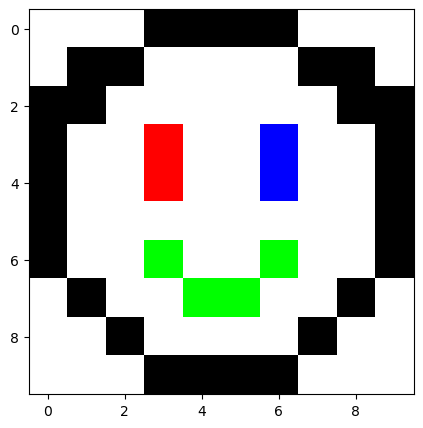

In [100]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))
plt.imshow(image_data)
plt.show()

## 5.2. 논리 배열을 이용한 인덱싱

In [102]:
a = np.array([0,1,10,11,12,13,14,15,99])
a

array([ 0,  1, 10, 11, 12, 13, 14, 15, 99])

In [105]:
a % 2 == 0  # 논리배열

array([ True, False,  True, False,  True, False,  True, False, False])

In [107]:
a[[True, False, True, False, True, False, True, False, False]]

array([ 0, 10, 12, 14])

In [108]:
a[a % 2 == 0] # 논리 배열을 이용한 인덱싱 시 True요소만 추출 

array([ 0, 10, 12, 14])

In [109]:
# a 에서 12 보다 큰 값만 추출
a[a > 12]

array([13, 14, 15, 99])

# 6절. 선형대수

- 2차원 넘파이배열을 행렬
    * 행렬곱 : @, dot(), 단위행렬
    * 역행렬 : np.linalg.inv(행렬) : 역행렬@행렬 - 단위행렬
    * 전치행렬 : 행렬.T / 행렬.transpose()

In [111]:
a = np.array([[1, 2], [3, 4]])
a  # 정방행렬 : 정방행렬만 역행렬을 구할 수 있다.

array([[1, 2],
       [3, 4]])

In [113]:
# a의 역행렬 : a의 역행렬 @ a = a @ a의 역행렬 -> 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [115]:
# 단위행렬
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

## 6.1. 선형 연립 방정식 풀기 (독립변수1, 데이터2)

In [30]:
x = np.array([2, 4])  # 독립변수
Y = np.array([40, 60])  # 종속변수

# X = np.dstack((x, np.ones(len(x)))) # dstack : 차원증가
X = np.column_stack((x, np.ones(len(x))))

X, X.shape

(array([[2., 1.],
        [4., 1.]]),
 (2, 2))

In [31]:
Y.reshape(-1,1) # 출력결과가 나오면, Y는 그대로, return 
# Y = Y.reshape(-1,1)
# Y

array([[40],
       [60]])

In [32]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y
# wb = X의 역행렬 @ Y
# print(X, Y)
wb = np.linalg.inv(X) @ Y
wb

array([10., 20.])

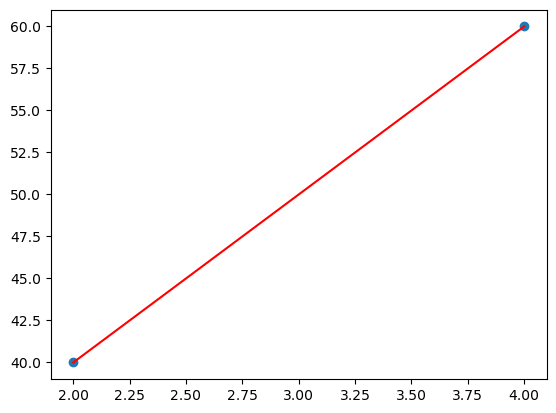

In [33]:
import matplotlib.pyplot as plt

plt.scatter(x, Y)
plt.plot(x, 10 * x + 20, 'r') # r은 RED 색상
plt.show()

In [34]:
np.linalg.solve(X, Y) # w (기울기), b (Y절편)을 구하는 함수

array([10., 20.])

## 6.2. 선형연립방정식 풀기(회귀분석) : 독립변수 1개, 데이터 n개



In [43]:
x = np.array([32, 64, 96, 118])
X = np.c_[x, np.ones(len(x))]
X # 정방행렬이 아님


array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.]])

In [ ]:
# np.linalg.inv(X) X가 정방행렬이 아니면 역행렬을 구할 수 없음

In [44]:
# X의 역행렬 @ X @ wb = X 의 역행렬 @Y

In [46]:
X.T, X.transpose() # 전치행렬

(array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]),
 array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]))

In [47]:
X_ = X.T @ X
X_

array([[2.826e+04, 3.100e+02],
       [3.100e+02, 4.000e+00]])

In [49]:
# X가 정방행렬이 아닐 경우, X.T @ X 로 정방행렬을 만든 후 역행렬을 곱
np.linalg.inv(X_) @ X_

array([[1., 0.],
       [0., 1.]])

In [3]:
x = np.array([32, 64, 96, 118, 126, 144, 152.5, 158])
y = np.array([18, 24, 61.5, 49, 52, 105, 130.3, 125])
X = np.c_[x, np.ones(len(x))] # np.c_[x, np.ones(x.shape[0])]
Y = y.reshape(-1, 1)
X, Y

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 array([[ 18. ],
        [ 24. ],
        [ 61.5],
        [ 49. ],
        [ 52. ],
        [105. ],
        [130.3],
        [125. ]]))

In [4]:
#              X @ wb  = Y
#        X_(X.T @ X) @ wb  = X.T @ Y
# (X.T @ X)의 역행렬 @ X.T @ X @ wb = (X.T @ X)의 역행렬 @ X.T @ Y
    # X_의 역행렬 @ X_ @ wb = X_의 역행렬 @ X.T @ Y
wb = np.linalg.inv(X.T @ X) @ X.T @ Y
wb

array([[  0.87493126],
       [-26.79078617]])

In [5]:
print(wb[0, 0], wb[1, 0])  # 기울기와 Y절편

y_hat = wb[0, 0] * x + wb[1, 0]
print('독립변수 : ', x)
print('종속변수 : ', y)
print('예측값 : ', y_hat)

0.8749312625981291 -26.79078616795418
독립변수 :  [ 32.   64.   96.  118.  126.  144.  152.5 158. ]
종속변수 :  [ 18.   24.   61.5  49.   52.  105.  130.3 125. ]
예측값 :  [  1.20701424  29.20481464  57.20261504  76.45110282  83.45055292
  99.19931565 106.63623138 111.44835332]


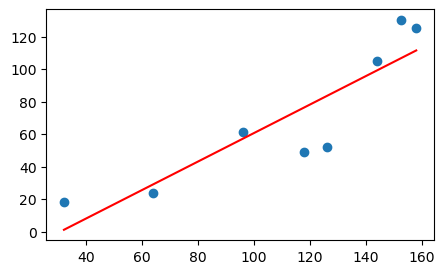

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.scatter(x, y)
plt.plot(x, y_hat, 'r')
plt.show()

# 7절. 연습문제

## 7.1. 실습문제 (실습형)

In [118]:
# 1) 문제
# 다음 코드는 iris 데이터의 독립변수(sepal_length, sepal_width, petal_length, petal_length)
# 정보만 갖도록 한 코드입니다. 이를 이용해서 주어진 문제를 해결하세요.

import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
iris.data = iris.data
iris.data
# type(iris_data), iris_data.dtype, iris_data.shape


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [255]:
# 1. 열별 평균
iris_data.mean(axis=0)
np.mean(iris_data, axis=0)
np.average(iris_data, axis=0) 

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [104]:
import seaborn as sns
sns.load_dataset('iris').head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [257]:
# 2. 처음 다섯개 행을 출력하세요.
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [269]:
# 3. 처음 다섯개 행에서 마지막 열을 제외한 나너지 열을 출려하세요
ex3 = iris.data[:5,:-1]
ex3

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [146]:
# 4. 처음 다섯개 행에서 마지막 열만 출력하세요
iris.data[:5,-1]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
# 5. 3번 배열과 4번 배열을 원래 모양이 되도록 합치세요. 실행 결과는 2번의 결과와 같아야 합니다.

In [276]:
a_data = iris.data[:5,:-1]
b_data = iris.data[:5,-1]
result = np.c_[a_data, b_data] # 제일 많이 쓴다.

# result = np.hstack([a_data, b_data.reshape(-1, 1)])
print(result)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [305]:
# 문제풀이형5. (2)
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])
answer1 = np.c_[a, b]
answer2 = np.column_stack([a, b])
answer3 = np.hstack((a[:, np.newaxis], b[:, np.newaxis]))
answer4 = np.stack([a, b], axis=1)
answer5 = np.stack([a, b], axis=-1)

answers = [answer1, answer2, answer3, answer4, answer5]

# all([np.all(answer1 == answer) for answer in answers])
# all(np.all(answer1 == answer) for answer in answers)

same_all(answer1, answer2, answer3, answer4, answer5)
#same_all(*answers) # 9번쨰 줄부터를 대체

# 위의 5개 답이 다 같은지 여부
# np.all(answer1 == answer2)
# np.all(answer1 == answer3)
# np.all(answer1 == answer4)
# np.all(answer1 == answer5)

True

In [304]:
def same_all(*answers):
    if len(answers) > 0:
        return all(np.all(answers[0] == answer) for answer in answers)
    else:
        return False

In [328]:
# 6. 처음 다섯 개 행을 이용해서 각 열 별로 평균보다 큰 값들만 출력하세요
x = iris.data[:5].copy()
print("x", x)

# 열평균
c_means = np.mean(x, axis = 0)
print("열평균 : ", c_means)

result = x > c_means
result

values = x[result]
print(values)


x [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
열평균 :  [4.86 3.28 1.4  0.2 ]
[5.1 3.5 4.9 1.5 5.  3.6]


In [327]:
# 6. 다른 풀이

x[x > np.mean(x, axis=0)]
x[x <= np.mean(x, axis=0)] = None # 결측치(타입:float)
x

array([[5.1, 3.5, nan, nan],
       [4.9, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, 1.5, nan],
       [5. , 3.6, nan, nan]])

In [333]:
x = iris.data[:5].copy()
# 위의 결과를 출력
np.where(x > np.mean(x, axis=0), x, None) # x의 배열은 안 바뀜

array([[5.1, 3.5, None, None],
       [4.9, None, None, None],
       [None, None, None, None],
       [None, None, 1.5, None],
       [5.0, 3.6, None, None]], dtype=object)

## 7.2. 실습문제 (문제풀이형)

In [335]:
# 1. 다음 보기의 데이터가 있을 경우 print(a.sum(0))의 결과는?
import numpy as np
a = np.arange(12).reshape(3,4)
print("a", a)
print("a.sum(0)", a.sum(0))

# 정답 : 3번

a [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
a.sum(0) [12 15 18 21]


In [336]:
# 2. a 데이터가 다음과 같을 떄, 다음중 차원을 바꿀 수 있는 방법을 모두 고르세요
a = np.floor(10 * np.random.random((3, 4)))
print("a", a)

print("shape", a.shape)

print("a.ravel()",a.ravel())
print("reshape", a.reshape(6, 2))
print("resize", a.resize(6, 2))
print("a.T", a.T)

# 정답 : 3

a [[4. 4. 8. 7.]
 [5. 3. 9. 5.]
 [7. 6. 9. 3.]]
shape (3, 4)
a.ravel() [4. 4. 8. 7. 5. 3. 9. 5. 7. 6. 9. 3.]
reshape [[4. 4.]
 [8. 7.]
 [5. 3.]
 [9. 5.]
 [7. 6.]
 [9. 3.]]
resize None
a.T [[4. 8. 5. 9. 7. 9.]
 [4. 7. 3. 5. 6. 3.]]


In [337]:
# 3. 다음 데이터에서 첫번째 행과 두번째 행만 뽑아내고 싶습니다. 빈칸에 들어갈 내용으로 옳은 것을 고르세요.

a = np.arange(12).reshape(3,4)
print("a", a , end="\n\n")
print("a[:2]", a[:2], end="\n\n")
print("a[:, :2]", a[:, :2], end="\n\n")
print("a[1,2]",a[1,2], end="\n\n")
print("a[1][2]", a[1][2], end="\n\n")

# 정답 : 1

a [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

a[:2] [[0 1 2 3]
 [4 5 6 7]]

a[:, :2] [[0 1]
 [4 5]
 [8 9]]

a[1,2] 6

a[1][2] 6



In [229]:
# 4.다음 코드의 실행 결과는 ?
a = np.array([1,2,3,4,5])
a[[1,3,4]] = 0
a

# 정답 : 2
    
    

array([1, 0, 3, 0, 0])

In [235]:
# 5.다음 두 배열 a, b를 출력의 예시처럼 만들고 싶을 때 빈 칸에 입력해야 할 내용으로 바른 것은?

a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])

print("np.r_[a,b]",np.r_[a,b])
print("np.r_[a,b]",np.c_[a,b])
print("np.ix_(a,b)",np.ix_(a,b))
print("[[a],[b]]",[[a],[b]])

# 정답 : 2번

np.r_[a,b] [ 1  2  3  4  5  6  7  8  9 10]
np.r_[a,b] [[ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]]
np.ix_(a,b) (array([[1],
       [2],
       [3],
       [4],
       [5]]), array([[ 6,  7,  8,  9, 10]]))
[[a],[b]] [[array([1, 2, 3, 4, 5])], [array([ 6,  7,  8,  9, 10])]]
